In [ ]:
!pip install cx_Oracle

     ------------------------------------- 213.2/213.2 kB 13.5 MB/s eta 0:00:00


In [ ]:
import cx_Oracle
import pandas as pd

db = cx_Oracle.connect('c##lm', 'lm', 'localhost:1521/xe')
cursor = db.cursor()
cursor.execute('select * from HGROUP')
x = cursor.fetchall()
df = pd.DataFrame(x)    # column은 안가지고 온다
cursor.execute("select column_name from user_tab_columns where table_name='HGROUP'")
col = cursor.fetchall()
list1 = []
for i in col:
    for j in i:
        list1.append(j)

df.columns = list1
df.head()

,고객번호,14년상반기,14년하반기,15년상반기,15년하반기,1구간,2구간,3구간,대그룹,중그룹,14년상반기_가중치,14년하반기_가중치,전체총액,전체총액_가중치
0,15565,40688082,47447390,31867370,35783700,6759308,-1.591215e+07,3916330,기존고객,증감증,4.097290e+07,4.777952e+07,155786542,1.564035e+08
1,09839,15620210,82771910,16970700,39593670,67151700,-6.638061e+07,22622970,기존고객,증감증,1.572955e+07,8.335131e+07,154956490,1.556452e+08
2,00082,24029720,44198016,30271926,55821428,20168296,-1.423548e+07,25549502,기존고객,증감증,2.419793e+07,4.450740e+07,154321090,1.547987e+08
3,03089,3156974,11217384,27618403,111337971,8060410,1.632250e+07,83719568,기존고객,증증증,3.179073e+06,1.129591e+07,153330732,1.534314e+08
4,03180,31634505,30079577,43442490,47532624,-1554928,1.315236e+07,4090134,기존고객,감증증,3.185595e+07,3.029013e+07,152689196,1.531212e+08


In [ ]:
list(cursor.execute("select column_name from user_tab_columns where table_name='DEMO'"))

[('고객번호',), ('성별',), ('연령대',), ('거주지역',)]

In [ ]:
df_lm = pd.read_csv('df_lm.csv', index_col=0)
df_lm.head()

,고객번호,H1,H2,H3,H4,성별,연령대,거주지역
0,1,19925355,34116312,17898365,13102518,M,60세이상,60.0
1,2,24323230,21922100,27791610,25843820,M,60세이상,100.0
2,3,851215,1042554,592280,679118,M,60세이상,33.0
3,4,5042106,4257510,3656937,3737257,F,60세이상,16.0
4,5,5460150,2225730,2934930,2616260,M,60세이상,100.0


In [ ]:
# Q H1 대비 H4간의 구매감소 고객의 비중을 구하세요.

len(df_lm[df_lm.H4 < df_lm.H1]) / len(df_lm)

0.4273332301501316

In [ ]:
# H1 대비 H4간 고객별 성장율 컬럼을 추가하세요.

df_lm['성장률'] = round(((df_lm.H4 - df_lm.H1) / df_lm.H1 * 100),2)

CAGR(Compound Annual Growth Rate)
- 연복리 성장률을 나타내는 지표
- 주어진 기간 동안의 성장률을 하나의 수치로 요약하여 비교 및 분석에 용이
- 장점은 단순 평균 수익률보다 정확한 성장률을 제공하고, 시간에 따른 변동성을 고려하여 성장률을 측정
- 한계는 특정기간 동안의 평균 성장률을 알려주지만, 성장률의 변동성이나 시계열 데이터의 패턴은 미 반영
- 변동성이나 패턴을 반영하는 지표는 표준편차, 변동계수, 이동평균, 지수 이동평균, 상대강도지수 등이 있음
- CAGR = (최종 가치 / 초기 가치) ^ (1 / 기간) - 1

In [ ]:
# CAGR - 연평균 성장률
# 부드럽게 성장한 것, 매 분기마다 H1-H2, H2-H3, H3-H4

df_lm['CAGR'] = (df_lm.H4/df_lm.H1)**(1/4)-1
df_lm

,고객번호,H1,H2,H3,H4,성별,연령대,거주지역,증감율,성장률,CAGR
0,1,19925355,34116312,17898365,13102518,M,60세이상,60.0,-6822837,-34.24,-0.099493
1,2,24323230,21922100,27791610,25843820,M,60세이상,100.0,1520590,6.25,0.015275
2,3,851215,1042554,592280,679118,M,60세이상,33.0,-172097,-20.22,-0.054903
3,4,5042106,4257510,3656937,3737257,F,60세이상,16.0,-1304849,-25.88,-0.072134
4,5,5460150,2225730,2934930,2616260,M,60세이상,100.0,-2843890,-52.08,-0.168008
...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,0,1190620,2395920,2192740,F,20세~24세,69.0,2192740,inf,inf
19379,19380,0,522700,837950,2552327,F,20세~24세,39.0,2552327,inf,inf
19380,19381,0,0,2797171,3243498,F,40세~44세,460.0,3243498,inf,inf
19381,19382,0,0,1826739,2575034,F,45세~49세,460.0,2575034,inf,inf


In [ ]:
# Q H1 대비 H4간의 구매감소 고객의 비중을 구하세요. (CAGR 기준)

len(df_lm[df_lm.CAGR < 0]) / len(df_lm)

0.4273332301501316

In [ ]:
df_lm['증감'] = df_lm.H4 - df_lm.H1
df_lm.증감.describe()

count    1.938300e+04
mean     1.026025e+06
std      2.116641e+07
min     -1.387164e+09
25%     -9.668465e+05
50%      2.954460e+05
75%      1.875210e+06
max      1.007656e+09
Name: 증감, dtype: float64

과제3_0512 employees 테이블을 불러와서 다음사항을 수행하세요.
- 컬럼명을 포함하여 employees 테이블을 데이터프레임으로 출력
- department_id별 평균 연봉을 출력
- 부서별 평균 연봉을 수평 그래프로 시각화

C:\Users\h\AppData\Local\Temp\ipykernel_20016\149110299.py:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.group = df.groupby('DEPARTMENT_ID')['SALARY'].mean()


Text(0, 0.5, 'Department ID')

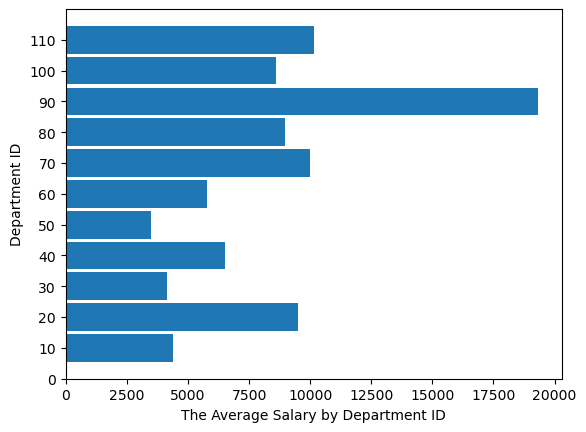

In [ ]:
import cx_Oracle
import pandas as pd
import matplotlib.pyplot as plt

db = cx_Oracle.connect('c##hmkd1', 'hmkd1', 'localhost:1521/xe')
cursor = db.cursor()
cursor.execute('select * from employees')
x = cursor.fetchall()
df = pd.DataFrame(x)    # column은 안가지고 온다
cursor.execute("select column_name from user_tab_columns where table_name='EMPLOYEES'")
col = cursor.fetchall()
list1 = []
for i in col:
    for j in i:
        list1.append(j)

df.columns = list1
df.head()

df.group = df.groupby('DEPARTMENT_ID')['SALARY'].mean()

x = df.group.index
y = df.group.values

plt.barh(x, y, height=9)
plt.yticks(np.arange(0,111,10))
plt.xlabel('The Average Salary by Department ID')
plt.ylabel('Department ID')

과제2_0512. 과제1에서 작성한 테이블을 주피터로 불러오세요.

In [ ]:
import cx_Oracle
import pandas as pd

db = cx_Oracle.connect('c##lm', 'lm', 'localhost:1521/xe')
cursor = db.cursor()
cursor.execute('select * from d_c_pur')
x = cursor.fetchall()
df = pd.DataFrame(x)    # column은 안가지고 온다
cursor.execute("select column_name from user_tab_columns where table_name='D_C_PUR'")
col = cursor.fetchall()
list1 = []
for i in col:
    for j in i:
        list1.append(j)

df.columns = list1
df.head()

,고객번호,성별,연령대,거주지역,구매일자,제휴사,구매금액,SUM_2014,SUM_2015
0,00007,F,60세이상,036,20140103,A,72480,72480.0,NaN
1,00007,F,60세이상,036,20140103,A,2058650,4117300.0,NaN
2,00007,F,60세이상,036,20140104,A,30000,60000.0,NaN
3,00007,F,60세이상,036,20140105,A,7900,7900.0,NaN
4,00007,F,60세이상,036,20140105,A,13000,13000.0,NaN


과제4_0512. 과제2에서 불러온 데이터프레임을 탐색하여 통계적 시각적으로 탐색하여 인사이트를 도출하세요

In [ ]:
df.groupby('제휴사').sum()

과제5_0512. 코드